# Центральная предельная теорема своими руками

## Экспоненциальное распределение 

Wiki: https://en.wikipedia.org/wiki/Exponential_distribution

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
import scipy.stats as sts

In [2]:
lambd = 0.2

In [3]:
exp_rv = sts.expon(scale = 1/lambd)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

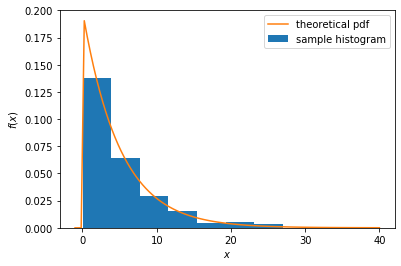

In [4]:
# выборка на 1000 элементов
sample = exp_rv.rvs(1000)
x = np.linspace(-1,40,100)
pdf = exp_rv.pdf(x)
plt.hist(sample, normed=True, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Для экспоненциального распределения: среднее: ${lamda}^{-1}$, дисперсия: ${lamda}^{-2}$, где $lamda=4$

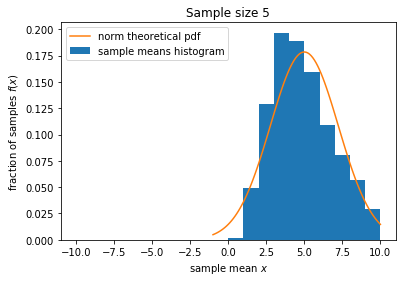

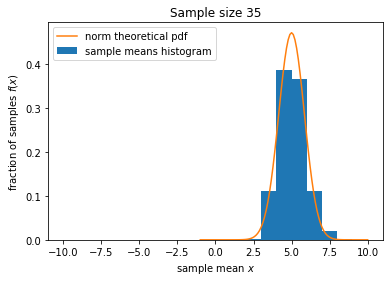

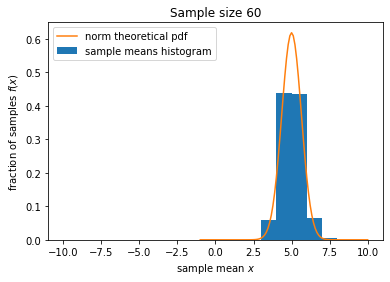

In [5]:
# для выборок размера n
for n in [5, 35, 60]:
    # вычисляется сдеднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(exp_rv.rvs(n).mean())
        #print (sample_means)
    # построение гистограммы 
    plt.hist(sample_means, 20, normed=True, range=[-10, 10], label='sample means histogram')
    # вычисляется pdf нормального распределения с данными параметрами
    norm_rv = sts.norm(lambd**(-1), np.sqrt((lambd**(-2))/n))
    x = np.linspace(-1,10, 100)
    pdf = norm_rv.pdf(x)
    # построение нормального распределения
    plt.plot(x, pdf, label='norm theoretical pdf')
    # легенда графика
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к 5. Т.е. при увеличении n точность апроксимации растет.
При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.